In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

In [2]:
root_dir = "/home/kevin/Documents/master-thesis/datasets/andasus_dataset/synced"
clip_folder = "clip1"

In [3]:
import matplotlib.pyplot as plt
import json

with open(os.path.join(root_dir, clip_folder, "params.json"), "r") as f:
    clip_params = json.load(f)

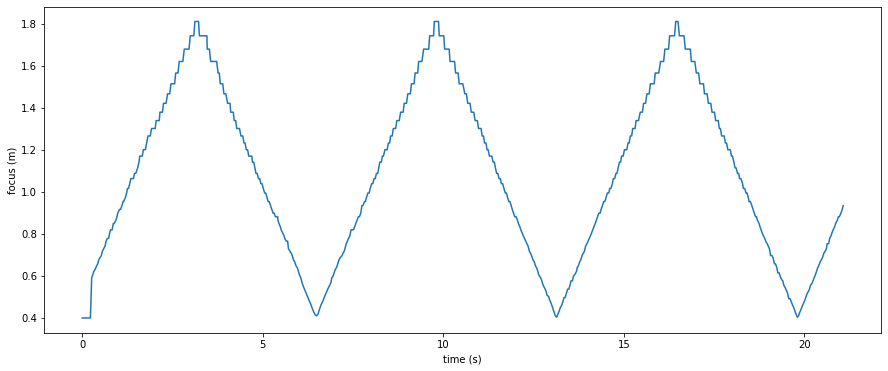

In [4]:
timestamps = [f["time"] for f in clip_params["frames"]]
focus_sets = [f["focus"] for f in clip_params["frames"]]

plt.figure(figsize=(15, 6))
plt.xlabel("time (s)")
plt.ylabel("focus (m)")
plt.plot(timestamps, focus_sets)

In [5]:
#sample = data.load_item(0)

Seeeeeeeeeeeeeding!!!
Dataset type: train

Data dirs ['../../../datasets/s7/train/seq0', '../../../datasets/s7/train/seq20', '../../../datasets/s7/train/seq39']
Using stats: ../../../datasets/s7/stats_total.json
Data Stats {'focus_min': 0.1, 'focus_max': 0.5, 'frames': {'depth': {'min': 0, 'max': 1.5}}}
MIN DEPTH HARDCODED!!!
depth_normalize: Normalize(0.03, 1.5, clamp_max=False)
coc_normalize: None
signed_coc_normalize: Normalize(-0.0003278836342927652, 0.00010109296328134595, clamp_max=False)
Lens: {'focal_length': 0.004200000000000001, 'depth_scale': 1, 'f_number': 1.7, 'aperture_radius': 0.002470588235294118}


/home/kevin/miniconda2/envs/torch/lib/python3.6/site-packages/torch/cuda/__init__.py:118: UserWarning: 
    Found GPU0 GeForce GTX 660M which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


tensor([0.1000, 0.4500], device='cuda:0')
torch.Size([5, 3, 256, 256]) torch.Size([2, 1, 256, 256]) torch.Size([2, 1, 256, 256]) torch.Size([2, 1, 256, 256])
Color CoC FgBg Depth CompDepth


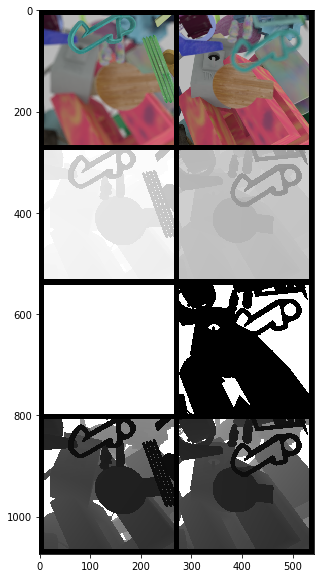

In [6]:
from tools.tools import deterministic, squeeze_dict, unsqueeze_dict, dict_to_dev
from tools.vis_tools import plot_tensor_grid, flow_to_vis
from data.video_depth_focus_data import VideoDepthFocusData
import matplotlib.pyplot as plt
from matplotlib import cm
import torch
from net.extend_data_modules import ExtendDataModule, ExtendDataFocusDist, ExtendDataFlow

deterministic()

data = VideoDepthFocusData(proj_dir("datasets"), "train", "s7")

depth_output_indices = [0, -1]
include_flow = False
include_coc = "signed"

data.configure(#sample_count=5, sample_skip=0, 
               select_focus_dists=[0.1, 0.1875, 0.275, 0.3625, 0.45],
               include_flow=include_flow, 
               include_coc=include_coc, use_allinfocus=False, depth_output_indices=depth_output_indices,
               include_fgbg=True, rand_reverse=False,
               color_noise_stddev=None, depth_noise_stddev=0.0)

sample = dict_to_dev(unsqueeze_dict(data[0]), "cuda")

#print(sample)
#extend_data_module = ExtendDataFlow(flow_to_first="direct", warp_images=False).cuda() # ExtendDataFocusDist()
#sample = extend_data_module(sample)

sample = squeeze_dict(sample)

plt.figure(figsize=[10,10])

color = sample["color"]
coc = sample["coc"] if include_coc != "signed" else sample["signed_coc"]
fgbg = sample["fgbg"].byte()
depth = sample["depth"]

focus_dist = sample["focus_dist"]
print(focus_dist)

"""
if include_coc != "signed":
    comp_depth = data.lens.get_depth_from_fgbg_coc(focus_dist, fgbg, coc,
                                                   data.coc_normalize, data.depth_normalize)
else:
    comp_depth = data.lens.get_depth_from_signed_coc(focus_dist, coc,
                                                     data.signed_coc_normalize, data.depth_normalize)
                                                     """

# print("Diff", ((comp_depth - sample["depth"])**2).sum())

if depth_output_indices is None:
    idx = coc.shape[0] // 2
    coc = coc[idx]
    fgbg = fgbg[idx]
    depth = depth[idx]
    # comp_depth = comp_depth[idx]

print(color.shape, depth.shape, coc.shape, fgbg.shape)
# print(depth.min(), depth.max())
depth[depth > 1] = 1
# comp_depth[comp_depth > 1] = 1
    
print("Color", "CoC", "FgBg", "Depth", "CompDepth")

#print(coc.size())
#depth = torch.Tensor(cm.get_cmap(None)(depth[0])).permute(2, 0, 1)[:3]
#print(type(depth), depth.shape)


# flow = flow_to_vis(color[-1, 3:])
plot_tensor_grid([color[0, :3], color[-1, :3], coc, fgbg, depth])

#plot_tensor_grid([color[0, :3], color[-1, :3], coc, fgbg, depth, comp_depth])

In [11]:
from tools.tools import deterministic

deterministic()

key = 0

data = VideoDepthFocusData(proj_dir("datasets"), "train", "s7_5ramp")
data.configure(sample_count=5, sample_skip=0, 
               #select_focus_dists=[0.1, 0.1875, 0.275, 0.3625, 0.45],
               include_flow=include_flow, 
               include_coc=include_coc, use_allinfocus=False, depth_output_indices=-1,
               test_target_frame=4,
               include_fgbg=True, rand_reverse=False,
               color_noise_stddev=None, depth_noise_stddev=0.01,
               fixed_frame_indices=range(0, 24, 6)
              )

#data.sample_skip = 1
#data.data_type = "test"

for i in range(10):
    params = data._load_params(key)
    frame_indices = data.choose_frame_indices(key, params)

    print(frame_indices)

Seeeeeeeeeeeeeding!!!
Dataset type: train

Data dirs ['../../../datasets/s7_5ramp/train/seq0', '../../../datasets/s7_5ramp/train/seq26']
Multi ramp
Ramps in dataset 5
Using stats: ../../../datasets/s7_5ramp/stats_total.json
Data Stats {'focus_min': 0.1, 'focus_max': 0.5, 'frames': {'depth': {'min': 0, 'max': 1.5}}}
MIN DEPTH HARDCODED!!!
depth_normalize: Normalize(0.03, 1.5, clamp_max=False)
coc_normalize: None
signed_coc_normalize: Normalize(-0.0003278836342927652, 0.00010109296328134595, clamp_max=False)
Lens: {'focal_length': 0.004200000000000001, 'depth_scale': 1, 'f_number': 1.7, 'aperture_radius': 0.002470588235294118}
range(0, 24, 6)
range(0, 24, 6)
range(0, 24, 6)
range(0, 24, 6)
range(0, 24, 6)
range(0, 24, 6)
range(0, 24, 6)
range(0, 24, 6)
range(0, 24, 6)
range(0, 24, 6)


In [8]:
from tools.tools import deterministic
from tools.vis_tools import visualize_tensors, flow_to_vis
from data.video_depth_focus_data import VideoDepthFocusData, VideoDepthFocusDataMp4
import matplotlib.pyplot as plt

deterministic()

data = VideoDepthFocusDataMp4(proj_dir("datasets"), "test", "s7")
data.configure_blender_data(sample_count=6)
sample = data[0]

#print(sample)

plt.figure(figsize=[10,10])

color = sample["color"]

visualize_tensors([[color[-1]]], column_order=True, cmap="gray")
#visualize_tensors([[color[-1]], [coc], [fgbg], [depth], [comp_depth]], column_order=True, cmap="gray")

Seeeeeeeeeeeeeding!!!
Dataset type: test
Test mode

Data dirs ['../../../datasets/s7/test/seq0']


AttributeError: 'VideoDepthFocusDataMp4' object has no attribute 'configure_blender_data'

In [ ]:
from data.data_transforms import Normalize
import torch

val = torch.Tensor([0.4, 0.5, 0.6])

norm = Normalize(0.4, 0.6, eps_min=1e-1, eps_max=1e-1)

v = norm(val)

print(v)
v[0] + v[2]

In [ ]:
a = torch.randn([6, 1, 224, 224])
b = torch.randn(6)

a - b[:,None,None,None]

In [ ]:
from tools import load_blender_flow_exr

size = [512, 512]
flow1 = load_blender_flow_exr(
    "/home/kevin/Documents/master-thesis/datasets/dining_room/train/seq0124/flow3110.exr", 
    size, backward=False)

flow2 = load_blender_flow_exr(
    "/home/kevin/Documents/master-thesis/datasets/dining_room/train/seq0124/flow3111.exr", 
    size, backward=True)

print(((flow1 + flow2)**2).sum())

In [ ]:
print(torch.linspace(0.1, 0.5, 25))

In [ ]:
a = torch.zeros(3)

a[3]
a[2:3]